### <font color='red'>1.</font> 匯入影像處理套件

In [118]:
# cv2 用來讀取圖片及相關處理
import cv2
import numpy as np
import matplotlib.pyplot as plt

### <font color='red'>2.</font> 設置計算圖片相關參數的方法函數: <font color='blue'>calc_image</font>
輸入值：圖片 ndarray  
輸出值：imgf 圖片一維陣列, bins 圖表x座標, pdf 機率密度函數, cdf 累積分布函數

In [119]:
def calc_image(image):
    imgf = image.flatten()
    hist, bins = np.histogram(imgf, 255)
    pdf = hist/np.sum(hist)
    cdf = np.cumsum(pdf)
    
    return imgf, bins, pdf, cdf

### <font color='red'>3.</font> 設置直方圖等化的方法函數:  <font color='blue'>equalize_hist</font>
輸入值：圖片 ndarray  
輸出值：等化後的圖片 ndarray

In [120]:
def equalize_hist(image):
    imgf, bins, pdf, cdf = calc_image(image)
    return np.array([(cdf[px]*255).astype(np.uint8) for px in imgf]).reshape(image.shape)

### <font color='red'>4.</font> 設置繪製圖表的方法函數:  <font color='blue'>print_chart</font>
輸入值：圖片 ndarray  

### 繪製三個圖形
- 圖片
- 直方圖
- 機率密度函數與累積分布函數

In [157]:
def print_chart(image):
    imgf, bins, pdf, cdf = calc_image(image)
    
    plt.gray()
    fig = plt.figure()
    fig.set_size_inches((18, 4))
    
    gs = plt.GridSpec(1, 5, wspace=0.4, hspace=0.1)
    
    #  繪製圖片
    plt.subplot(gs[0,0])
    plt.imshow(image)
    plt.title(image.shape)
    plt.axis('off')
    
    # 繪製直方圖
    plt.subplot(gs[0,1:3])    
    plt.hist(imgf, bins = bins, color = 'navy')
    plt.xlim([-10, 266])
    plt.title("histogram")
    
    # 繪製機率密度函數與累積分布函數
    ax1 = plt.subplot(gs[0,3:5])
    ax2 = ax1.twinx()
    ax1.plot(pdf, 'g-')    
    ax2.plot(cdf, 'b-')
    plt.ylim([-0.1, 1.1])
    ax1.set_xlabel('Gray Level')
    ax1.set_ylabel('Probability Density Function', color='g')
    ax2.set_ylabel('Cumulative Distribution Function', color='b')
    plt.title("distribution")
    plt.show()

### <font color='red'>5.</font> 顯示原始圖以及等化後的圖形資訊

<Figure size 432x288 with 0 Axes>

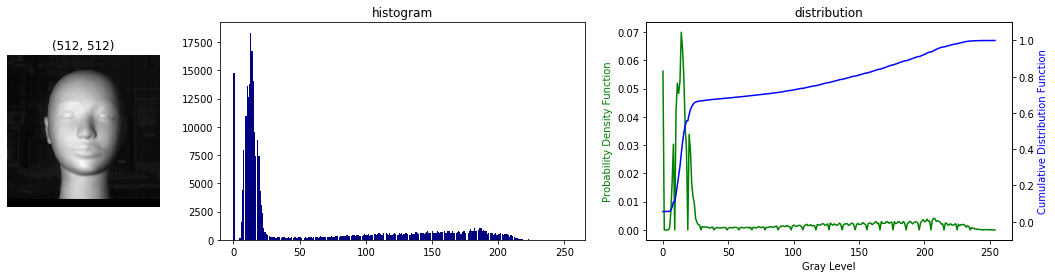

<Figure size 432x288 with 0 Axes>

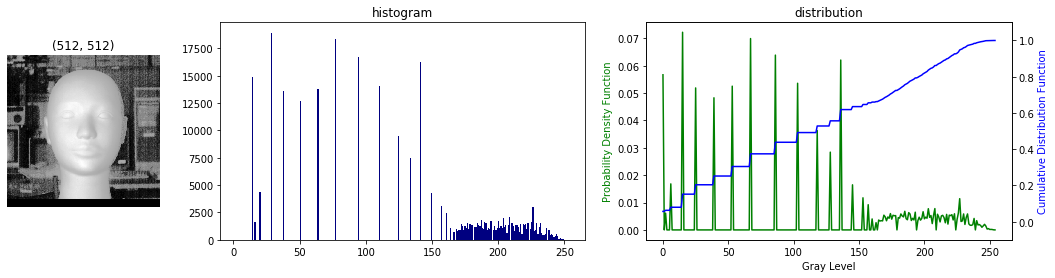

In [158]:
anny_img = cv2.imread('data/anny.bmp', 0)
anny_eq = equalize_hist(anny_img)
print_chart(anny_img)
print_chart(anny_eq)

### <font color='red'>6.</font> 顯示左上截圖以及等化後的圖形資訊
- 原始圖的左上角截圖
- 原始圖等化後的左上角截圖
- 原始圖的左上角截圖再進行等化

<Figure size 432x288 with 0 Axes>

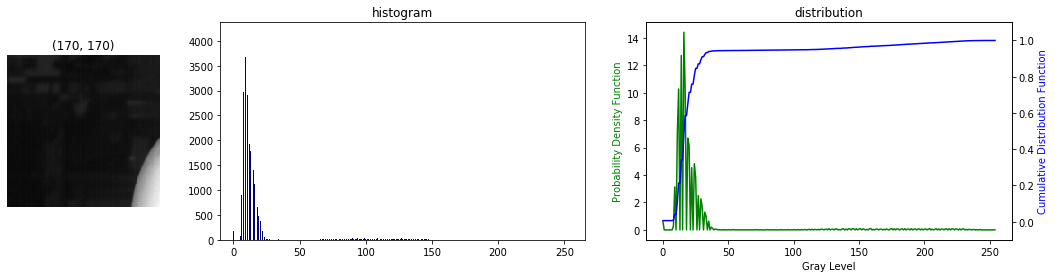

<Figure size 432x288 with 0 Axes>

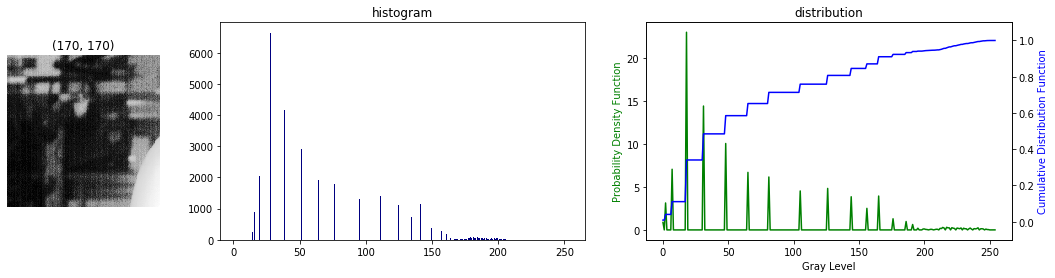

<Figure size 432x288 with 0 Axes>

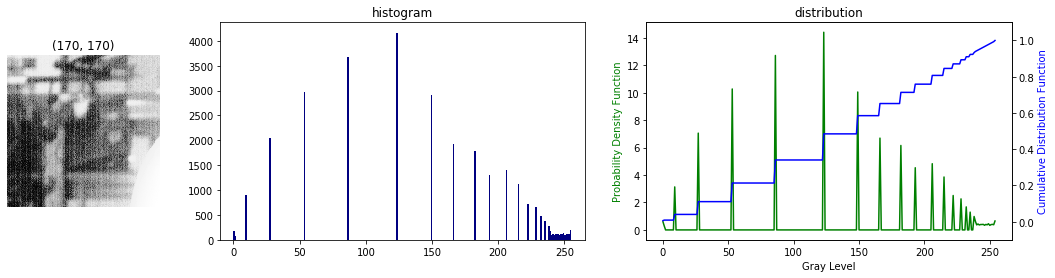

In [146]:
img_len = int(anny_img.shape[0]/3)
anny_crop = anny_img[0:img_len, 0:img_len]
anny_eqcr = anny_eq[0:img_len, 0:img_len]
anny_creq = cv2.equalizeHist(anny_crop)
print_chart(anny_crop)
print_chart(anny_eqcr)
print_chart(anny_creq)

### <font color='red'>7.</font> 顯示原圖二值化結果

<Figure size 432x288 with 0 Axes>

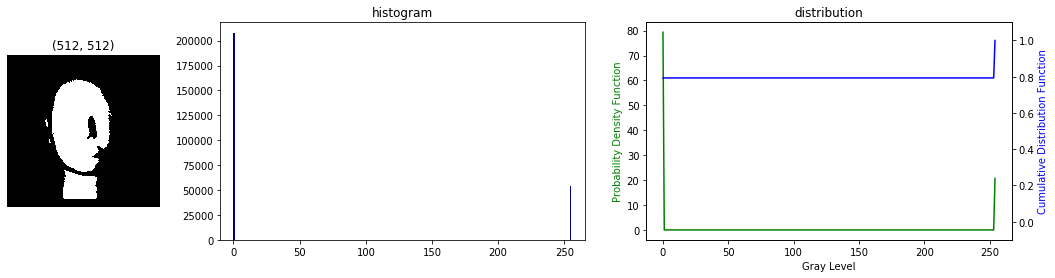

In [147]:
ret1, th1 = cv2.threshold(anny_img, 127, 255, cv2.THRESH_BINARY)
print_chart(th1)

### <font color='red'>8.</font> 顯示等化後原圖二值化結果

<Figure size 432x288 with 0 Axes>

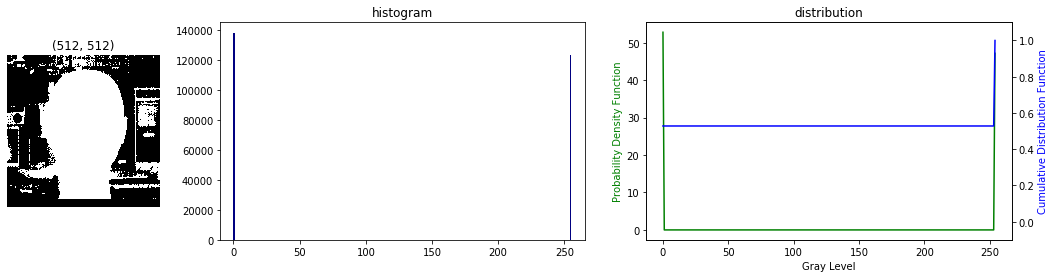

In [148]:
ret2, th2 = cv2.threshold(anny_eq, 127, 255, cv2.THRESH_BINARY)
print_chart(th2)

### <font color='red'>9.</font> 顯示Otsu's二值化結果

111.0


<Figure size 432x288 with 0 Axes>

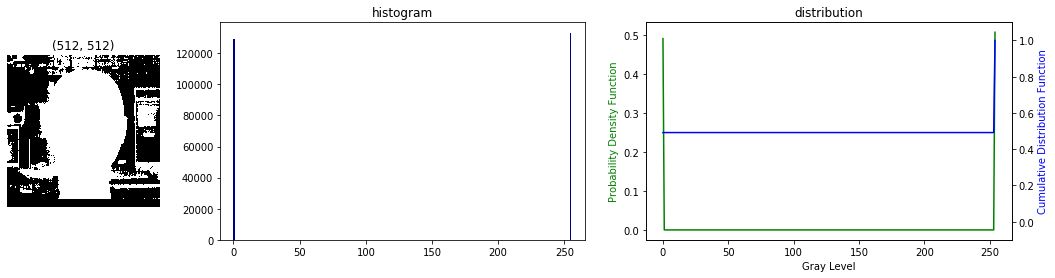

In [159]:
ret3, th3 = cv2.threshold(anny_eq, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret3)
print_chart(th3)

In [126]:
# binary: https://blog.csdn.net/on2way/article/details/46812121
# histogram projection: https://stackoverflow.com/questions/9351278/opencv‐color‐concentration‐histogram
# non-histogram: https://stackoverflow.com/questions/10964226/how‐to‐convert‐an‐image‐into‐character‐segments
# find_peaks: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks_cwt.html